In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class KNN:
    def __init__(self, k, x_train, y_train):
        self.k = k
        self.x_train = x_train
        self.y_train = y_train

    def dist(self, x1, x2):
        return np.linalg.norm(x1 - x2)

    def predict(self, x):
        # calculate distance of x with each data point
        distances = [self.dist(x, data_point) for data_point in self.x_train]
        sorted_dist = np.argsort(distances)
        k_indices = sorted_dist[:self.k]
        k_labels = [y_train[i] for i in k_indices]
        # majority voting
        prediction = np.bincount(k_labels).argmax()
        return prediction

    def evaluate(self, test_batch, test_batch_label):
        acc = 0
        for (sample, label) in zip(test_batch, test_batch_label):
            p = self.predict(sample)
            if p == label:
                acc += 1

        acc /= len(test_batch)
        return acc

# Load dataset

In [ ]:
data = load_iris()
x = data.data
y = data.target

iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['label'] = y

print("features", data.feature_names)
print("labels:", data.target_names)
print("shape of x:", x.shape)
print("shape of y:", y.shape)

features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
labels: ['setosa' 'versicolor' 'virginica']
shape of x: (150, 4)
shape of y: (150,)


# Scatter plot

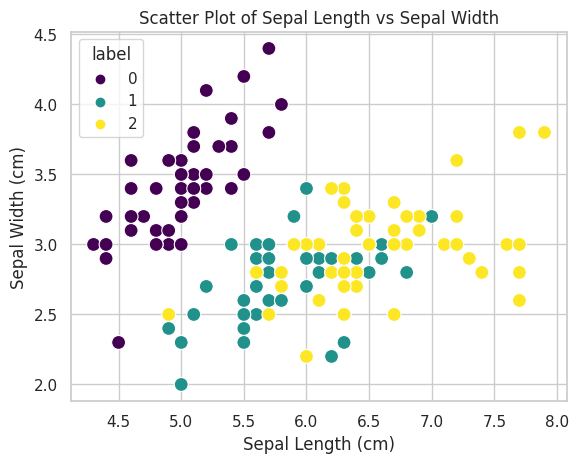

In [ ]:
# scatter plot for first two features
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='label', data=iris_df, palette='viridis', s=100)

# Set plot labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

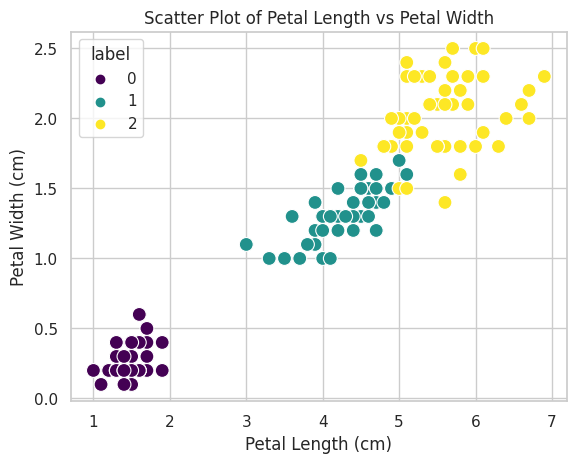

In [ ]:
# scatter plot for second two features
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='label', data=iris_df, palette='viridis', s=100)

# Set plot labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

# Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=82)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


# Apply KNN on iris

In [ ]:
knn_classifier = KNN(5, X_train, y_train)

# evaluate on train data
train_acc = knn_classifier.evaluate(X_train, y_train)
print("Train Accuracy: ", train_acc)

# evaluate on test data
test_acc = knn_classifier.evaluate(X_test, y_test)
print("Test Accuracy: ", test_acc)

Train Accuracy:  0.975
Test Accuracy:  0.9333333333333333


In [ ]:
accuracy = []

for k in range(1, 11):
    k_classifier = KNN(k, X_train, y_train)
    accuracy.append(k_classifier.evaluate(X_test, y_test))

# Plot for different values of K

Text(0.5, 1.0, 'Accuracy of each K value')

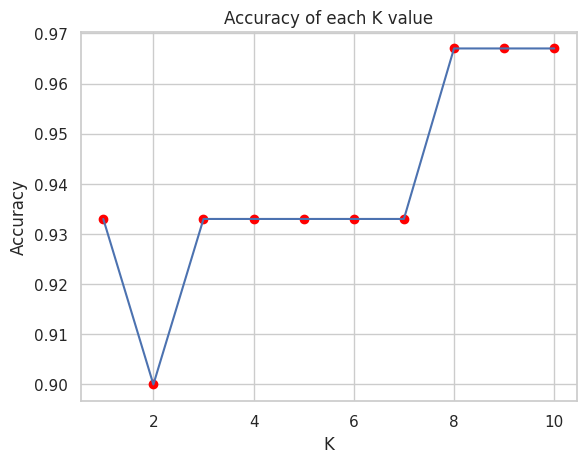

In [ ]:
plt.plot(range(1, 11), [round(x, 3) for x in accuracy])
plt.scatter(range(1, 11), [round(x, 3) for x in accuracy], c='red')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy of each K value')